# Assignment 1: Linear Regression
Regression Group 8:
* Mat Bosc
* Paola Katherine Pacheco
* Wai Ping Kwok (Evaluator)
* Xueyao Wang (Facilitator)

# House predictions with linear regression

In [ ]:
# install turicreate in Google Colab
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.6 MB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=641a2f958e5aed0819b3457e2249f4026a5ef039d47f17dc5d499b9f90454c31
  Stored in directory: /root/.cache/pip/wheels/48/6d/77/9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=40f87a2b37a20e7e2da9ffd836f56a5ae7943558cfa0df124a53125daa3e3963

In [ ]:
# import libraries for use
# utils should be uploaded to the Files inside Google Colab before import
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [ ]:
# import csv from github
data = tc.SFrame('https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_3_Linear_Regression/Hyderabad.csv')
data

Downloading https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_3_Linear_Regression/Hyderabad.csv to /var/tmp/turicreate-root/128/cba39c34-f0ce-4b6f-839c-67405ab78583.csv

Finished parsing file https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_3_Linear_Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.049169 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_3_Linear_Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.028545 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


In [ ]:
# Line commented because we are using the file from github instead of a local copy
# data = tc.SFrame('Hyderabad.csv')
# data

In [ ]:
# rename columns to maintain a naming pattern(No. of Bedrooms)

data = data.rename({"No. of Bedrooms": "NofBedrooms"})

### Exploring the relationship between price and area

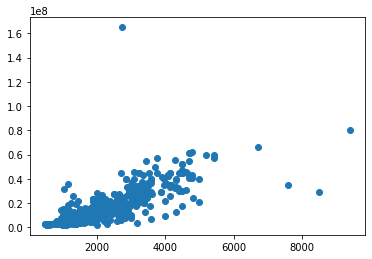

In [ ]:
plt.scatter(data['Area'], data['Price'])

In [ ]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.002212     | 46592017.908990    | 144622866.628222     | 4000781.330154                  | 13303145.540977                   |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [ ]:
simple_model.coefficients

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,-6029985.319932301,196900.06820893812
Area,None,9602.588615167282,109.02612725950371


In [ ]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9602.588615167282
y-intercept: -6029985.319932301


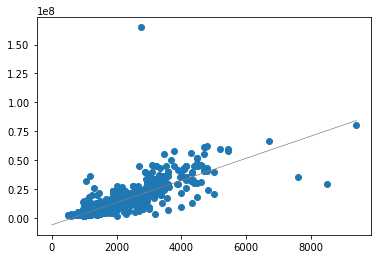

In [ ]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [ ]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 276

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.050849     | 140328196.444244   | 17193623.154967      | 4275408.336574                  | 3023024.848897                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
model.coefficients

name,index,value,stderr
(intercept),None,-2954252.749134261,609714.2739630429
Area,None,8905.283201885597,260.8523815549601
Location,Hitech City,5174410.551670486,789038.7908232356
Location,Manikonda,-46495.772498398306,672314.3724000931
Location,Alwal,-774449.448169111,1219609.9757096395
Location,Kukatpally,1826979.6177110393,652792.6878852579
Location,Gachibowli,4580648.294306422,764504.8955431439
Location,Tellapur,-935706.0445033298,1069159.8956755376
Location,Kokapet,615512.3590023711,803441.8541807381
Location,Hyder Nagar,1723934.4470884486,2085259.3895466398


In [ ]:
model.evaluate(data)

{'max_error': 140328196.44424447, 'rmse': 4221579.275605265}

In [ ]:
house = tc.SFrame({'Area': [1000], 'NofBedrooms':[3]})
house

Area,NofBedrooms
1000,3


In [ ]:
model.predict(house)

dtype: float
Rows: 1
[2174394.213632876]

## Problem 1 

### a) Basic Information 
There are 2518 rows and 40 columns in the data file.
We used the `data.show` function, similar to `info()` from Pandas.

In [ ]:
# to visualize a summary of each column
data.show

<bound method SFrame.show of Columns:
	Price	int
	Area	int
	Location	str
	NofBedrooms	int
	Resale	int
	MaintenanceStaff	int
	Gymnasium	int
	SwimmingPool	int
	LandscapedGardens	int
	JoggingTrack	int
	RainWaterHarvesting	int
	IndoorGames	int
	ShoppingMall	int
	Intercom	int
	SportsFacility	int
	ATM	int
	ClubHouse	int
	School	int
	24X7Security	int
	PowerBackup	int
	CarParking	int
	StaffQuarter	int
	Cafeteria	int
	MultipurposeRoom	int
	Hospital	int
	WashingMachine	int
	Gasconnection	int
	AC	int
	Wifi	int
	Children'splayarea	int
	LiftAvailable	int
	BED	int
	VaastuCompliant	int
	Microwave	int
	GolfCourse	int
	TV	int
	DiningTable	int
	Sofa	int
	Wardrobe	int
	Refrigerator	int

Rows: 2518

Data:
+----------+------+-------------+-------------+--------+------------------+-----------+
|  Price   | Area |   Location  | NofBedrooms | Resale | MaintenanceStaff | Gymnasium |
+----------+------+-------------+-------------+--------+------------------+-----------+
| 6968000  | 1340 |   Nizampet  |      2 

### b) Scatter Plots
From the scatter plot of price vs. area, there are 3 potential outliers. Below are the [x, y] coordinates.

* [2750, 165000000]
* [7600, 35000000]
* [8500, 29000000]


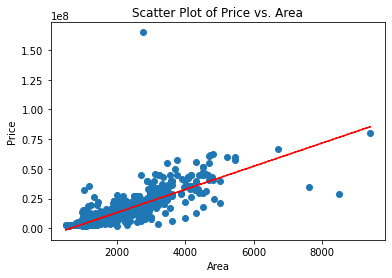

In [ ]:
# import matplotlib to plot the data
import matplotlib.pyplot as plt

# display scatter plot
plt.scatter(data['Area'], data['Price'])

# display a best fit line
z = np.polyfit(data['Area'], data['Price'], 1)
p = np.poly1d(z)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Area')
plt.plot(data['Area'], p(data['Area']), "r--")
plt.show()


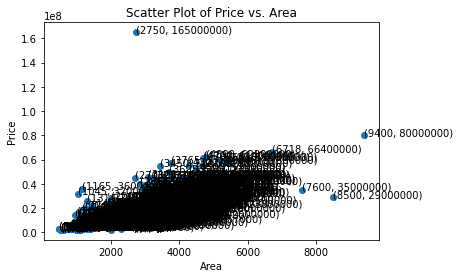

In [ ]:
# find the coordinates
plt.scatter(data['Area'], data['Price'])

for xy in zip(data['Area'], data['Price']):
   plt.annotate(xy, xy=xy)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Area')
plt.show()

### c) Equation of the Best Fit

The equation of the best fit line produced by *simple_model*

y = mx + b


In [ ]:
# coefficients values to variables b and m 
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)
print("Equation:\ny = ", m, "x ", b)

slope: 9602.588615167282
y-intercept: -6029985.319932301
Equation:
y =  9602.588615167282 x  -6029985.319932301


### d) Coefficient and Intercept of Trained *model*

The coefficient values associated with the intercept and area in the trained *model* that uses all features.

These values are not the same as the intercept and slope found by *simple_model*.

In [ ]:
# find coefficients for model
coeff = model.coefficients
coeff

name,index,value,stderr
(intercept),None,-2954252.749134261,609714.2739630429
Area,None,8905.283201885597,260.8523815549601
Location,Hitech City,5174410.551670486,789038.7908232356
Location,Manikonda,-46495.772498398306,672314.3724000931
Location,Alwal,-774449.448169111,1219609.9757096395
Location,Kukatpally,1826979.6177110393,652792.6878852579
Location,Gachibowli,4580648.294306422,764504.8955431439
Location,Tellapur,-935706.0445033298,1069159.8956755376
Location,Kokapet,615512.3590023711,803441.8541807381
Location,Hyder Nagar,1723934.4470884486,2085259.3895466398


In [ ]:
# show the coefficients for model
print('model:')
print('Intercept: ', coeff['value'][0])
print('Area:', coeff['value'][1])

model:
Intercept:  -2954252.749134261
Area: 8905.283201885597


In [ ]:
# find coefficients for simple_model
simple_model.coefficients
print('simple_model')
print("y-intercept:", b)
print("slope:", m)

simple_model
y-intercept: -6029985.319932301
slope: 9602.588615167282


### e) Maximum error and root-mean-squared error of *model*

* Maximum error is *'max_error'*: <br>
It is the absolute value of the maximum **error** between the predicted value and the actual value. The lower the value, the better the model is.


* Root-mean-squared error is *'rmse'*: <br>
It is the square root of the mean of the square of the **error** between the predicted value and the actual value. The lower the value, the better the model is.

The **error** also refers to how far the data points are from the regression line.



In [ ]:
# check max_error and rmse using evaluate method
max_error, rmse = model.evaluate(data).items()
print(max_error)
print(rmse)

('max_error', 140340289.57610685)
('rmse', 4221461.776203412)


### f) Prediction and Uncertainty

Using *model*, the price of a house with three bedrooms and an area of 1000 square feet is predicted.

There is uncertainty of the above prediction. 

From part (e), we can find the rmse of the *model*. rmse is an estimation of standard deviation of the distribution of the errors, i.e. difference between the predicted value and the actual value, in the *model*. 

For the predicted value obtained above, if we consider the predicted value with the rmse to develop a range for the actual value.  

predicted_price +- rmse 

i.e. predicted_price - rmse <= actual value <= predicted_price + rmse 
<br>
<br>

It brought to our attention that the range is quite wide. It may mean that there are many outliers in the dataset used by the *model*. We would like to see how the predicted values behave by running the regression 100 times and predicting with same features.

Again, the range of these 100 predicted values is wide. From the scatter plot of 100 predicted values, we can see there are 7 outliers. The previous prediction lies in this 90% of predicted values. We should investigate further how to improve the *model*.












In [ ]:
# create house model for prediction
house = tc.SFrame({'Area': [1000], 'NofBedrooms':[3]})
house

Area,NofBedrooms
1000,3


In [ ]:
# predict the house price with Area = 1000 and No of Bedrooms = 3
price = model.predict(house)
print('Predicted price: ', price)
print('Uncertainty: ', price - rmse[1], ' and ', price + rmse[1])

Predicted price:  [2170298.823580507]
Uncertainty:  [-2051162.9526229044]  and  [6391760.599783919]


In [ ]:
# demostrate how the predicted value may vary  
# by running the regression model for 100 times and put the results into a list
prices = []
for i in range(100):
    model = tc.linear_regression.create(data, target='Price')
    prices.append(model.predict(house))

In [ ]:
# show the 5th and 95th of the predicted values
upper_price = np.percentile(prices, 95)
lower_price = np.percentile(prices, 5)
print(upper_price)
print(lower_price)

7100483.010791306
1935502.8102688438


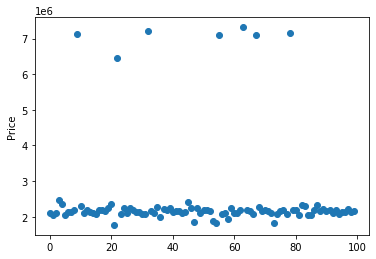

In [ ]:
# show scatter plot of the 100 predicted values
plt.scatter(range(len(prices)), prices)
plt.ylabel('Price')
plt.show()

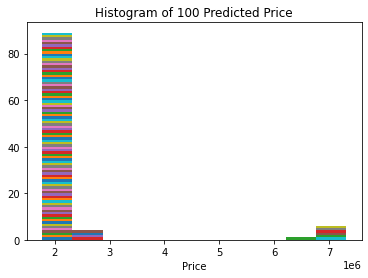

In [ ]:
# plot a histogram for the 100 predicted prices
# 'stepfilled' generates a lineplot that is by default filled
# 'stacked' bool', If True, multiple data are stacked on top of each other 
# If False multiple data are arranged side by side 
# if histtype is 'bar' or on top of each other if histtype is 'step'
plt.hist(prices, bins=10, histtype='stepfilled', stacked=True)
plt.xlabel('Price')
plt.title('Histogram of 100 Predicted Price')
plt.show()